# Benefits of MPL Modeling for Actuator Selection - Random Graph (Erdos-Renyi) analysis

Statistics on the benefits of multiplicative noise modelling for actuator selection over N realizations of Erdos-Renyi random graphs

##### Py Packages

In [1]:
import numpy as np
from copy import deepcopy as dc
# %matplotlib widget

from functionfile_system_definition import create_graph, system_package, system_check
from functionfile_system_mplcost import random_graph_emperical_simulation, plot_random_graph_simulation

### Test Parameters

In [2]:
# Number of test iterations
N_test = 50

# Edge probability
edge_probability = 0.3

# Network parameters
nx = 20           # Number of nodes
rho = 0.95        # Open-loop stability (unsigned magnitude of largest eigenvalue of dynamics matrix)
alphai = [0.3]    # Covariance on state-dependent multiplicative noise

# Initial state - realization of distribution given mean and covariance 
X0_cov = 10*np.identity(nx)
X0_mean = np.zeros(nx)

### Code

In [3]:
X0 = np.random.default_rng().multivariate_normal(mean=X0_mean, cov=X0_cov)
S_base_model = system_package(A_in=rho*create_graph(nx)['A'], alphai_in=alphai, Ai_in=create_graph(nx)['A'], X0_in=X0, label_in='System Model', print_check=False)

In [4]:
simulation_values = random_graph_emperical_simulation(S_base_model, edge_probability, N_test)

### Plot

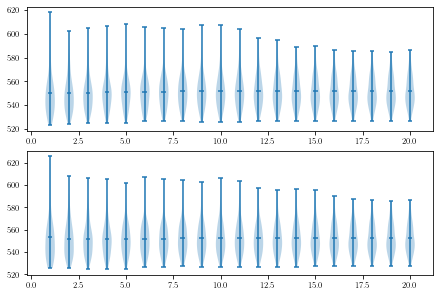

In [5]:
plot_random_graph_simulation(simulation_values)

In [6]:
# cost_record_nom = np.nan*np.zeros((nx, N_test))
# cost_record_mpl = np.nan*np.zeros((nx, N_test))

# for iter in range(0, N_test):
    
#     print("Realization: %s / %s" %(iter+1, N_test))

#     ER1 = create_graph(nx, type='ER', p=edge_probability)
#     ER2 = create_graph(nx, type='ER', p=edge_probability)
#     ER3 = create_graph(nx, type='ER', p=edge_probability)

#     S_MPL = system_package(A_in=rho*ER1['A'], alphai_in=alphai, Ai_in=ER2['A'], X0_in=X0, label_in='System MPL', print_check=False)
#     if not system_check(S_MPL)['check']:
#         print('MPL System Error')

#     S_Nom = system_package(A_in=rho*ER1['A'], X0_in=X0, label_in='System Nominal', print_check=False)
#     if not system_check(S_Nom)['check']:
#         print('Nominal System Error')

#     S_True = system_package(A_in=rho*ER3['A'], X0_in=X0, label_in='System True', print_check=False)
#     if not system_check(S_True)['check']:
#         print('True System Error')
    
#     ret_sim = simulation_nom_vs_mpl(S_Nom, S_MPL, S_True)
    
#     # print(ret_sim)
    
#     for i in ret_sim['T_Nom']['costs']:
#         cost_record_nom[int(i)-1, iter] = ret_sim['T_Nom']['costs'][i][-1]
#     for i in ret_sim['T_MPL']['costs']:
#         cost_record_mpl[int(i)-1, iter] = ret_sim['T_MPL']['costs'][i][-1]


# # print(cost_record_nom)
# # print(cost_record_mpl)

# fig1 = plt.figure(constrained_layout=True)
# gs1 = GridSpec(2, 1, figure=fig1)

# ax1 = fig1.add_subplot(gs1[0, 0])
# ax1.violinplot(cost_record_nom.T, showmeans=True)

# ax2 = fig1.add_subplot(gs1[1, 0])
# ax2.violinplot(cost_record_mpl.T, showmeans=True)

# plt.show()

# fig1 = plt.figure(constrained_layout=True)
# gs1 = GridSpec(1, 1, figure=fig1)

# ax1 = fig1.add_subplot(gs1[0, 0])
# ax1.violinplot(cost_record_nom.T, showmeans=True)
# ax1.violinplot(cost_record_mpl.T, showmeans=True)

# plt.show()

## Run Complete

In [7]:
print('Run Complete')

Run Complete
